In [1]:
import os
import glob as glob
import datetime as dt
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("C:/Users/gameon/Documents/Hamoye Internship/Study A")

In [3]:
Fuel = pd.read_csv('fuel_ferc1.csv')

In [4]:
Fuel.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [7]:
Fuel.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2012_12_45_4_1,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [6]:
Fuel.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [11]:
Fuel.groupby('fuel_unit')['fuel_unit'].count()

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11534
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

In [9]:
Fuel[['fuel_unit']] = Fuel[['fuel_unit']].fillna(value='mcf')

In [10]:
Fuel.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [13]:
Fuel.groupby('report_year')['report_year'].count()

report_year
1994    1235
1995    1201
1996    1088
1997    1094
1998    1107
1999    1050
2000    1373
2001    1356
2002    1205
2003    1211
2004    1192
2005    1269
2006    1243
2007    1264
2008    1228
2009    1222
2010    1261
2011    1240
2012    1243
2013    1199
2014    1171
2015    1093
2016    1034
2017     993
2018     951
Name: report_year, dtype: int64

In [14]:
Fuel.groupby('fuel_type_code_pudl').first()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


In [15]:
Fuel1 = Fuel.iloc[0:19000].reset_index(drop=True)
Fuel2 = Fuel.iloc[19000: ].reset_index(drop=True)

In [17]:
assert len(Fuel) == (len(Fuel1) + len(Fuel2))

In [18]:
print(len(Fuel1))
print(len(Fuel2))

19000
10523


In [20]:
FuelNew = pd.merge(Fuel1, Fuel2, how='outer')

In [21]:
FuelLeft = pd.merge(Fuel1, Fuel2, how='left')

In [24]:
print(len(FuelLeft))

19000


In [25]:
FuelConcat = pd.concat([Fuel1, Fuel2]).reset_index(drop=True)
len(FuelConcat)

29523

In [8]:
Fuel.duplicated().any()

False

Text(0.5, 0, 'Fuel Unit')

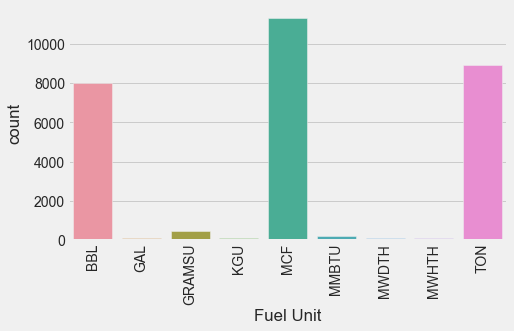

In [28]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=90)
fuel_unit = pd.DataFrame({'unit':['BBL', 'GAL', 'GRAMSU', 'KGU', 'MCF', 'MMBTU', 'MWDTH', 'MWHTH', 'TON'],
                         'count':[7998, 84, 464, 110, 11354, 180, 95, 100, 8958]})
sns.barplot(data=fuel_unit, x='unit', y='count')
plt.xlabel('Fuel Unit')

Text(0.5, 0, 'Fuel Unit')

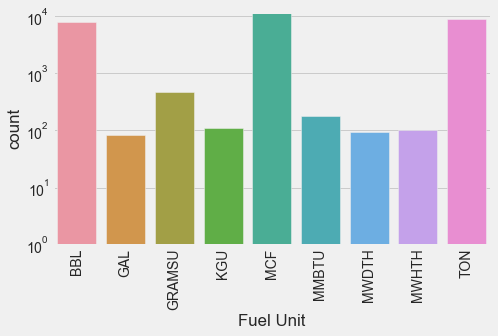

In [30]:
plt.figure(figsize=(7,4))
plt.xticks(rotation=90)
g = sns.barplot(data=fuel_unit, x='unit', y='count')
g.set_yscale('log')
g.set_ylim(1, 12000)
plt.xlabel('Fuel Unit')

In [31]:
Sample_Fuel = Fuel.sample(n=50, random_state=4)

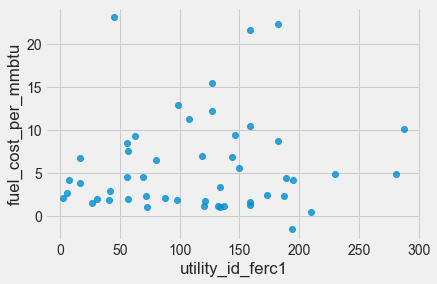

In [34]:
sns.regplot(x=Sample_Fuel['utility_id_ferc1'], y=Sample_Fuel['fuel_cost_per_mmbtu'], fit_reg=False)

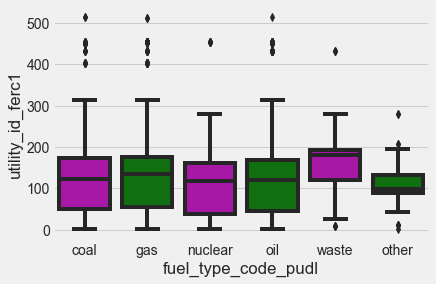

In [37]:
#Box Plot
sns.boxplot(x='fuel_type_code_pudl', y='utility_id_ferc1', palette=['m', 'g'], data=Fuel)

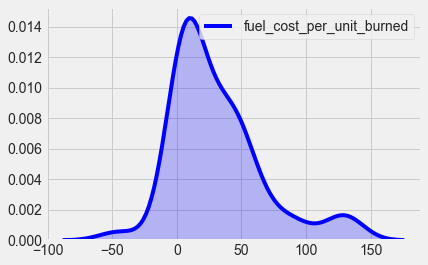

In [39]:
#KDE Plot
sns.kdeplot(Sample_Fuel['fuel_cost_per_unit_burned'], shade=True, color='b')